# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Colorado/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Colorado/Overlays


## Overlay Area Data #1 - Division_Boundaries

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/Division_Boundaries.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "wab" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Division_Boundaries.zip', compression=dict(method='zip', archive_name='Division_Boundaries.csv'), index=False)

print(len(dfin1))
dfin1.head(3)

7


,DIV,BASIN,Perimeter,Area,Acres,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,1.00000,South Platte,1445411.76733,72759746776.80000,17979324.98270,15.29453,7.67598,"POLYGON ((-102.05123 40.96917, -102.05153 40.9...",wab0
1,2.00000,Arkansas,1496778.69491,73229611064.80000,18095430.97690,15.51602,7.52532,"POLYGON ((-106.21608 39.38370, -106.21587 39.3...",wab1
2,5.00000,Colorado,1250001.01868,25488341013.10000,6298306.22900,12.96536,2.67185,"POLYGON ((-105.84560 40.48262, -105.84534 40.4...",wab2


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "11/18/2024"
df['in_Year'] = "2024"

# Organization Info
df['in_OrganizationUUID'] = "COov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1['BASIN']
df['in_ReportingUnitNativeID'] = "wab" + dfin1['DIV'].astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Colorado Water Administration Division"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "CO"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Colorado Division of Water Resources"
df['in_RegulatoryDescription'] = "The Colorado Division of Water Resources Division Offices are located in the seven major river basins throughout the state.  Division Offices employ Water Commissioners to ensure that the water rights priority system is followed, enforcing the decrees and water laws of the State of Colorado.  Other Division Office staff manage use and measurement rules to ensure that Colorado remains in compliance with interstate and interbasin agreements."
df['in_RegulatoryName'] = dfin1['BASIN']
df['in_RegulatoryOverlayNativeID'] = dfin1['DIV'].astype(int).astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] ="https://dwr.colorado.gov/division-offices"
df['in_StatutoryEffectiveDate'] = "11/18/2024"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Colorado Water Administration Division"
df['in_WaterSourceTypeCV'] = "Surface Water and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

7


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,wab0,11/18/2024,2024,COov_O1,4326,South Platte,wab1,,Colorado Water Administration Division,,CO,"POLYGON ((-102.05123 40.96917, -102.05153 40.9...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,South Platte,1,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater
1,wab1,11/18/2024,2024,COov_O1,4326,Arkansas,wab2,,Colorado Water Administration Division,,CO,"POLYGON ((-106.21608 39.38370, -106.21587 39.3...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Arkansas,2,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater
2,wab2,11/18/2024,2024,COov_O1,4326,Colorado,wab5,,Colorado Water Administration Division,,CO,"POLYGON ((-105.84560 40.48262, -105.84534 40.4...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Colorado,5,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater
3,wab3,11/18/2024,2024,COov_O1,4326,Yampa,wab6,,Colorado Water Administration Division,,CO,"POLYGON ((-106.12348 40.86754, -106.12209 40.8...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Yampa,6,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater
4,wab4,11/18/2024,2024,COov_O1,4326,Rio Grande,wab3,,Colorado Water Administration Division,,CO,"POLYGON ((-106.03476 38.45481, -106.03326 38.4...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Rio Grande,3,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater


## Overlay Area #2 - Designated_Basins

In [5]:
# Input File
inputFile = "RawInputData/shapefiles/Designated_Basins.zip"
dfin2 = gpd.read_file(inputFile).replace(np.nan, "")
dfin2['geometry'] = dfin2['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin2:
    dfin2['WaDEUUID'] = "dgb" + dfin2.index.astype(str)
    dfin2.to_csv('RawInputData/Designated_Basins.zip', compression=dict(method='zip', archive_name='Designated_Basins.csv'), index=False)

print(len(dfin2))
dfin2.head(3)

8


,OBJECTID,PERIMETER,DB,DB_NAME,AREA_MI,FORMATION_,AMENDED_DA,Shape_Leng,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,1,161885.34866,4,Upper Black Squirrel Creek,349.21403,1968-04-26,,161885.85457,1.64898,0.09401,"POLYGON ((-104.51561 39.07153, -104.51543 39.0...",dgb0
1,2,232805.10995,7,Upper Big Sandy,440.68245,1972-12-08,1994-11-08,232805.26265,2.48012,0.11907,"POLYGON ((-104.47861 39.08581, -104.46016 39.0...",dgb1
2,3,181543.04937,8,Upper Crow Creek,259.15241,1987-02-20,,181543.38238,1.90173,0.07173,"POLYGON ((-104.08604 40.98741, -104.08632 40.9...",dgb2


In [6]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin2['WaDEUUID']

# Date Info
df['in_Date'] = "11/18/2024"
df['in_Year'] = "2024"

# Organization Info
df['in_OrganizationUUID'] = "COov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin2['DB_NAME']
df['in_ReportingUnitNativeID'] = "dgb" + dfin2['DB'].astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Colorado Designated Groundwater Basins"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "CO"
df['in_Geometry'] = dfin2['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Colorado Division of Water Resources"
df['in_RegulatoryDescription'] = "Designated Groundwater Basins (Designated Basins) are areas in the eastern plains of Colorado with very little surface water where users rely primarily on groundwater as their source of water supply.  Designated groundwater rights are administered separately from water rights outside of the Designated Basins."
df['in_RegulatoryName'] = dfin2['DB_NAME']
df['in_RegulatoryOverlayNativeID'] = dfin2['DB'].astype(int).astype(str)
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] ="https://dwr.colorado.gov/services/well-permitting/designated-basins"
df['in_StatutoryEffectiveDate'] = dfin2['FORMATION_']
df['in_StatutoryEffectiveDate'] = pd.to_datetime(df['in_StatutoryEffectiveDate'], errors = 'coerce')
df['in_StatutoryEffectiveDate'] = pd.to_datetime(df['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Colorado Designated Groundwater Basins"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf2 = df.copy()
print(len(outdf2))
outdf2.head()

8


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,dgb0,11/18/2024,2024,COov_O1,4326,Upper Black Squirrel Creek,dgb4,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.51561 39.07153, -104.51543 39.0...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Black Squirrel Creek,4,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-04-26,,Colorado Designated Groundwater Basins,Groundwater
1,dgb1,11/18/2024,2024,COov_O1,4326,Upper Big Sandy,dgb7,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.47861 39.08581, -104.46016 39.0...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Big Sandy,7,Active,,https://dwr.colorado.gov/services/well-permitt...,1972-12-08,,Colorado Designated Groundwater Basins,Groundwater
2,dgb2,11/18/2024,2024,COov_O1,4326,Upper Crow Creek,dgb8,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.08604 40.98741, -104.08632 40.9...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Crow Creek,8,Active,,https://dwr.colorado.gov/services/well-permitt...,1987-02-20,,Colorado Designated Groundwater Basins,Groundwater
3,dgb3,11/18/2024,2024,COov_O1,4326,Lost Creek,dgb5,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.43346 40.29035, -104.41466 40.2...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Lost Creek,5,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-04-26,,Colorado Designated Groundwater Basins,Groundwater
4,dgb4,11/18/2024,2024,COov_O1,4326,Camp Creek,dgb6,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-103.32282 40.26361, -103.32239 40.2...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Camp Creek,6,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-05-13,,Colorado Designated Groundwater Basins,Groundwater


## Concatenate DataFrames together

In [7]:
# Concatenate dataframes
frames = [outdf1, outdf2] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

15


## Clean Data / data types

In [8]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [9]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['South Platte', 'Arkansas', 'Colorado', 'Yampa', 'Rio Grande',
       'Gunnison', 'San Juan/Dolores', 'Upper Black Squirrel Creek',
       'Upper Big Sandy', 'Upper Crow Creek', 'Lost Creek', 'Camp Creek',
       'Kiowa Bijou', 'Northern High Plains', 'Southern High Plains'],
      dtype=object)

In [10]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['The Colorado Division of Water Resources Division Offices are located in the seven major river basins throughout the state.  Division Offices employ Water Commissioners to ensure that the water rights priority system is followed, enforcing the decrees and water laws of the State of Colorado.  Other Division Office staff manage use and measurement rules to ensure that Colorado remains in compliance with interstate and interbasin agreements.',
       'Designated Groundwater Basins (Designated Basins) are areas in the eastern plains of Colorado with very little surface water where users rely primarily on groundwater as their source of water supply.  Designated groundwater rights are administered separately from water rights outside of the Designated Basins.'],
      dtype=object)

In [11]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['South Platte', 'Arkansas', 'Colorado', 'Yampa', 'Rio Grande',
       'Gunnison', 'San Juan/Dolores', 'Upper Black Squirrel Creek',
       'Upper Big Sandy', 'Upper Crow Creek', 'Lost Creek', 'Camp Creek',
       'Kiowa Bijou', 'Northern High Plains', 'Southern High Plains'],
      dtype=object)

In [12]:
# Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['2024-11-18 00:00:00', '1968-04-26 00:00:00', '1972-12-08 00:00:00',
 '1987-02-20 00:00:00', '1968-05-13 00:00:00', '1966-02-11 00:00:00',
 '1966-05-13 00:00:00', '1967-09-15 00:00:00']
Length: 8, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [13]:
# # Input File / or use same input as above

gdfin1 = outdf1.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

7


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,wab0,11/18/2024,2024,COov_O1,4326,South Platte,wab1,,Colorado Water Administration Division,,CO,"POLYGON ((-102.05123 40.96917, -102.05153 40.9...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,South Platte,1,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater,"POLYGON ((-102.05123 40.96917, -102.05153 40.9..."
1,wab1,11/18/2024,2024,COov_O1,4326,Arkansas,wab2,,Colorado Water Administration Division,,CO,"POLYGON ((-106.21608 39.38370, -106.21587 39.3...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Arkansas,2,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater,"POLYGON ((-106.21608 39.38370, -106.21587 39.3..."
2,wab2,11/18/2024,2024,COov_O1,4326,Colorado,wab5,,Colorado Water Administration Division,,CO,"POLYGON ((-105.84560 40.48262, -105.84534 40.4...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Colorado,5,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater,"POLYGON ((-105.84560 40.48262, -105.84534 40.4..."
3,wab3,11/18/2024,2024,COov_O1,4326,Yampa,wab6,,Colorado Water Administration Division,,CO,"POLYGON ((-106.12348 40.86754, -106.12209 40.8...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Yampa,6,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater,"POLYGON ((-106.12348 40.86754, -106.12209 40.8..."
4,wab4,11/18/2024,2024,COov_O1,4326,Rio Grande,wab3,,Colorado Water Administration Division,,CO,"POLYGON ((-106.03476 38.45481, -106.03326 38.4...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Rio Grande,3,Active,,https://dwr.colorado.gov/division-offices,11/18/2024,,Colorado Water Administration Division,Surface Water and Groundwater,"POLYGON ((-106.03476 38.45481, -106.03326 38.4..."


<Axes: >

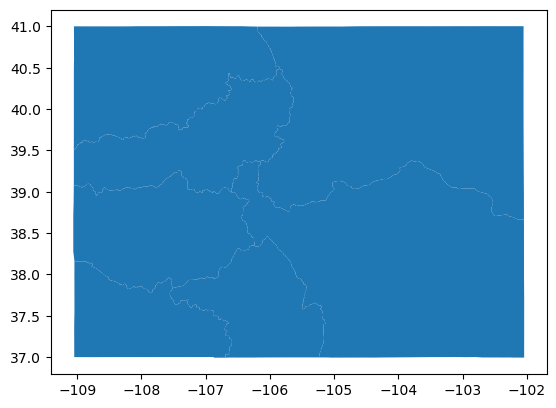

In [14]:
# plot shape info to map
gdfin1.plot()

In [15]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

7


,in_ReportingUnitNativeID,geometry
0,wab1,"POLYGON ((-102.05123 40.96917, -102.05153 40.9..."
1,wab2,"POLYGON ((-106.21608 39.38370, -106.21587 39.3..."
2,wab5,"POLYGON ((-105.84560 40.48262, -105.84534 40.4..."
3,wab6,"POLYGON ((-106.12348 40.86754, -106.12209 40.8..."
4,wab3,"POLYGON ((-106.03476 38.45481, -106.03326 38.4..."


#### Overlay Area #2 shapefile info

In [16]:
# # Input File / or use same input as above

gdfin2 = outdf2.copy()
gdfin2 = gpd.GeoDataFrame(gdfin2, geometry=gdfin2['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin2))
gdfin2.head()

8


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,dgb0,11/18/2024,2024,COov_O1,4326,Upper Black Squirrel Creek,dgb4,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.51561 39.07153, -104.51543 39.0...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Black Squirrel Creek,4,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-04-26,,Colorado Designated Groundwater Basins,Groundwater,"POLYGON ((-104.51561 39.07153, -104.51543 39.0..."
1,dgb1,11/18/2024,2024,COov_O1,4326,Upper Big Sandy,dgb7,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.47861 39.08581, -104.46016 39.0...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Big Sandy,7,Active,,https://dwr.colorado.gov/services/well-permitt...,1972-12-08,,Colorado Designated Groundwater Basins,Groundwater,"POLYGON ((-104.47861 39.08581, -104.46016 39.0..."
2,dgb2,11/18/2024,2024,COov_O1,4326,Upper Crow Creek,dgb8,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.08604 40.98741, -104.08632 40.9...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Crow Creek,8,Active,,https://dwr.colorado.gov/services/well-permitt...,1987-02-20,,Colorado Designated Groundwater Basins,Groundwater,"POLYGON ((-104.08604 40.98741, -104.08632 40.9..."
3,dgb3,11/18/2024,2024,COov_O1,4326,Lost Creek,dgb5,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.43346 40.29035, -104.41466 40.2...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Lost Creek,5,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-04-26,,Colorado Designated Groundwater Basins,Groundwater,"POLYGON ((-104.43346 40.29035, -104.41466 40.2..."
4,dgb4,11/18/2024,2024,COov_O1,4326,Camp Creek,dgb6,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-103.32282 40.26361, -103.32239 40.2...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Camp Creek,6,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-05-13,,Colorado Designated Groundwater Basins,Groundwater,"POLYGON ((-103.32282 40.26361, -103.32239 40.2..."


<Axes: >

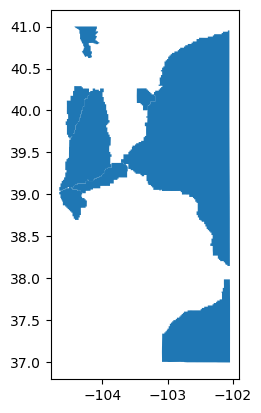

In [17]:
# plot shape info to map
gdfin2.plot()

In [18]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf2 = pd.DataFrame(columns=columnsList, index=gdfin2.index)

goutdf2['in_ReportingUnitNativeID'] =  gdfin2["in_ReportingUnitNativeID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf2['geometry'] = gdfin2['geometry']
goutdf2 = goutdf2.drop_duplicates().reset_index(drop=True)
print(len(goutdf2))
goutdf2.head()

8


,in_ReportingUnitNativeID,geometry
0,dgb4,"POLYGON ((-104.51561 39.07153, -104.51543 39.0..."
1,dgb7,"POLYGON ((-104.47861 39.08581, -104.46016 39.0..."
2,dgb8,"POLYGON ((-104.08604 40.98741, -104.08632 40.9..."
3,dgb5,"POLYGON ((-104.43346 40.29035, -104.41466 40.2..."
4,dgb6,"POLYGON ((-103.32282 40.26361, -103.32239 40.2..."


#### Concatenate goutdf shapefile info into single output

In [19]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1, goutdf2] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

15


,in_ReportingUnitNativeID,geometry
0,wab1,"POLYGON ((-102.05123 40.96917, -102.05153 40.9..."
1,wab2,"POLYGON ((-106.21608 39.38370, -106.21587 39.3..."
2,wab5,"POLYGON ((-105.84560 40.48262, -105.84534 40.4..."
3,wab6,"POLYGON ((-106.12348 40.86754, -106.12209 40.8..."
4,wab3,"POLYGON ((-106.03476 38.45481, -106.03326 38.4..."


## Export Data

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                             geometry
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [22]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,wab0,11/18/2024,2024,COov_O1,4326,South Platte,wab1,,Colorado Water Administration Division,,CO,"POLYGON ((-102.05123 40.96917, -102.05153 40.9...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,South Platte,1,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
1,wab1,11/18/2024,2024,COov_O1,4326,Arkansas,wab2,,Colorado Water Administration Division,,CO,"POLYGON ((-106.21608 39.38370, -106.21587 39.3...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Arkansas,2,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
2,wab2,11/18/2024,2024,COov_O1,4326,Colorado,wab5,,Colorado Water Administration Division,,CO,"POLYGON ((-105.84560 40.48262, -105.84534 40.4...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Colorado,5,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
3,wab3,11/18/2024,2024,COov_O1,4326,Yampa,wab6,,Colorado Water Administration Division,,CO,"POLYGON ((-106.12348 40.86754, -106.12209 40.8...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Yampa,6,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
4,wab4,11/18/2024,2024,COov_O1,4326,Rio Grande,wab3,,Colorado Water Administration Division,,CO,"POLYGON ((-106.03476 38.45481, -106.03326 38.4...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Rio Grande,3,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
5,wab5,11/18/2024,2024,COov_O1,4326,Gunnison,wab4,,Colorado Water Administration Division,,CO,"POLYGON ((-107.42554 39.25757, -107.42542 39.2...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,Gunnison,4,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
6,wab6,11/18/2024,2024,COov_O1,4326,San Juan/Dolores,wab7,,Colorado Water Administration Division,,CO,"POLYGON ((-109.04513 36.99902, -109.04493 37.0...",Colorado Division of Water Resources,The Colorado Division of Water Resources Divis...,San Juan/Dolores,7,Active,,https://dwr.colorado.gov/division-offices,2024-11-18,,Colorado Water Administration Division,Surface Water and Groundwater
7,dgb0,11/18/2024,2024,COov_O1,4326,Upper Black Squirrel Creek,dgb4,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.51561 39.07153, -104.51543 39.0...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Black Squirrel Creek,4,Active,,https://dwr.colorado.gov/services/well-permitt...,1968-04-26,,Colorado Designated Groundwater Basins,Groundwater
8,dgb1,11/18/2024,2024,COov_O1,4326,Upper Big Sandy,dgb7,,Colorado Designated Groundwater Basins,,CO,"POLYGON ((-104.47861 39.08581, -104.46016 39.0...",Colorado Division of Water Resources,Designated Groundwater Basins (Designated Basi...,Upper Big Sandy,7,Active,,https://dwr.colorado.gov/services/well-permitt...,1972-12-08,,Colorado Designated Groundwater Basins,Groundwater
9,dgb2,11/18/2024,2024,COov_O1,4326,Upper Crow Creek,dgb8,,Colorado Designated Groundwater Basins,,CO,"POLYGON

In [23]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.